In [2]:
import os
import cv2
import json
import importlib
import numpy as np
from PIL import Image
from IPython.display import display
import utils.process_utils as process_utils
importlib.reload(process_utils)

<module 'utils.process_utils' from '/home/shitianhao/project/DatProc/utils/process_utils.py'>

In [3]:
# open json file
json_path = '/datar/DAD-3DHeads/val/meta_1-1.json'

image_folder_dir = os.path.dirname(json_path)

with open(json_path) as json_file:
    data = json.load(json_file)


FileNotFoundError: [Errno 2] No such file or directory: '/datar/DAD-3DHeads/val/meta_1-1.json'

In [ ]:
vis_sample = 20

for img_path, meta in data.items():
    # load image
    abs_img_path = os.path.join(image_folder_dir, img_path)
    for box_id, box_meta in meta.items():
        lm = box_meta['landmarks']
        box = box_meta['head_box']
        if lm is None: continue
        img = cv2.imread(abs_img_path)
        box_x, box_y, box_w, box_h = box
        box_img = img[box_y:box_y+box_h, box_x:box_x+box_w].copy()
        vis_scale = 512/box_h
        for pt in lm:
            pt = (int(pt[0]), int(pt[1]))
            cv2.circle(box_img, pt, int(4/vis_scale), [0, 255, 0], -1)
        box_img_ = cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB)
        box_img_ = cv2.resize(box_img_, (512, 512))
        display(Image.fromarray(box_img_))
        vis_sample -= 1
    if vis_sample == 0: break


# K-Hairstyle Face Mask Visualization

In [ ]:
'''
Author: tianhao 120090472@link.cuhk.edu.cn
Date: 2023-09-27 21:12:02
LastEditors: tianhao 120090472@link.cuhk.edu.cn
LastEditTime: 2023-09-27 21:16:00
FilePath: /DatProc/misc.ipynb
Description: 

Copyright (c) 2023 by ${git_name_email}, All Rights Reserved. 
'''
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display
from utils.khs_filter import process_json
khs_sample_json_path = './assets/MN322068_040.json'
image_path = './assets/MN322068-040.jpg'
polygon = process_json(khs_sample_json_path)

image = np.array(Image.open(image_path))
h, w = image.shape[:2]
scale = 512/h
coords_list = []
for pt in polygon:
    pt_coord = [int(pt['X']), int(pt['Y'])]
    # cv2.circle(image, pt_coord, int(2/scale), [0, 255, 0], -1)
    coords_list.append(pt_coord)
coords = np.array(coords_list).reshape((-1, 1, 2))
image = cv2.fillPoly(image, [coords], color=[0, 255, 0])
# image = cv2.resize(image, (0,0), fx=scale, fy=scale)
display(Image.fromarray(image))

# FFHQ Landmark Visualization

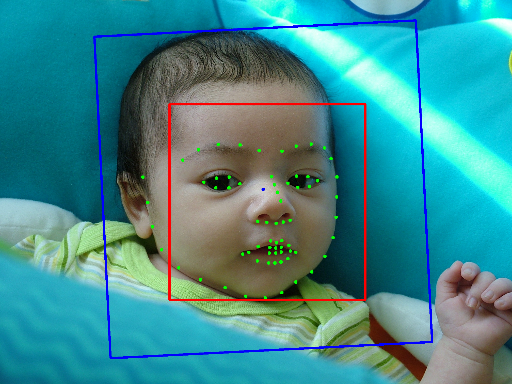

In [ ]:
import os
import cv2
import json
import numpy as np
from PIL import Image
from IPython.display import display

ffhq_lm_path = 'assets/ffhq-sample.json'
ffhq_datset_path = '/datar/FFHQ/'
with open(ffhq_lm_path, 'r') as json_file:
    data = json.load(json_file)
itw_img_path = data["0"]["in_the_wild"]["file_path"]
itw_img_path = os.path.join(ffhq_datset_path, itw_img_path)
max_side = 512
image = Image.open(itw_img_path)
lm = data["0"]["in_the_wild"]["face_landmarks"]
rect = data["0"]["in_the_wild"]["face_rect"]
quad = data["0"]["in_the_wild"]["face_quad"]
quad = np.array(quad, np.int32).reshape((-1, 1, 2))
quad_center = np.mean(quad[:, 0, :], axis=0).astype(np.int32)
x_1, y_1, x_2, y_2= rect
image = np.array(image)
for pt in lm:
    pt_int = (int(pt[0]), int(pt[1]))
    image = cv2.circle(image, pt_int, int(2/scale), [0, 255, 0], -1)
image = cv2.circle(image, quad_center, int(2/scale), [0, 0, 255], -1)
cv2.rectangle(image, (x_1, y_1), (x_2, y_2), [255, 0, 0], int(2/scale)) # not sure if this is the correct box
scale = 512 / np.max(image.shape[:2])
image = cv2.polylines(image, [quad], isClosed=True, color=[0, 0, 255], thickness=int(2/scale))
image = cv2.resize(image, (0,0), fx=scale, fy=scale)
display(Image.fromarray(image))



Conclusion: the json of FFHQ follows the following convention:
```json
{
    "data_index":{
        "category": "Training/Validating...",
        "metadata": {...},
        "image" : {
            // image attributes. the attributes for image, thumbnail and in-the-wild is same
        },
        "thumbnail":{},
        "in-the-wild":{
            "file_path": "relative path with the current json", // note that the 00000 in between the path should be deleted,
            "pixel_size":[
                1000,
                2000
            ], // image size
            "face_landmarks":[
                ["x1", "y1"],
                ["x2", "y2"],
                ......
                ["x68", "y68"]
            ], //facial landmark
        }
    }
}
```

# LPFF Landmark Visualization

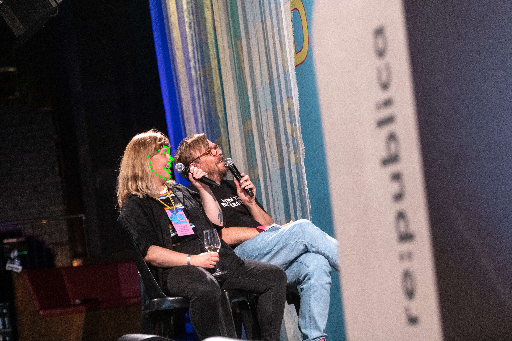

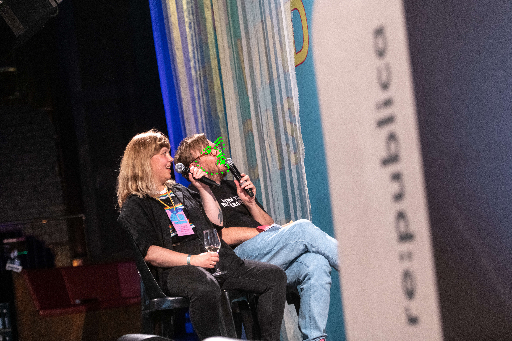

In [ ]:
import os
import cv2
import json
import numpy as np
from PIL import Image
from IPython.display import display

LPFF_META_PATH = '/home/shitianhao/project/DatProc/temp/raw_lm_sample.json'
LPFF_IMAGE_PATH = '/datar/LPFF/raw/'
with open(LPFF_META_PATH, 'r') as json_file:
    data = json.load(json_file)
for raw_img_name in data.keys():
    img_path = os.path.join(LPFF_IMAGE_PATH, f'{raw_img_name[:-3]}.png')
    image = Image.open(img_path)
    image = np.array(image)
    scale = 512 / np.max(image.shape[:2])
    lm = data[raw_img_name]
    for pt in lm:
        cv2.circle(image, pt, int(1/scale), [0, 255, 0], -1)
    image = cv2.resize(image, (0,0), fx=scale, fy=scale)
    display(Image.fromarray(image))

In [ ]:
RAW_LPFF_META = '/datar/LPFF/raw_lm.json'
with open(RAW_LPFF_META, 'r') as json_file:
    data = json.load(json_file)
img_names = []
attr_names = []
total = len(os.listdir(LPFF_IMAGE_PATH))
for raw_img_name in data.keys():
    img_name = raw_img_name[:-3]
    img_names.append(img_name)
    attr_names.append(raw_img_name)
attr_names = set(attr_names)
img_names = set(img_names)
if len(set(attr_names)) != len(set(img_names)):
    print(f"attr_names: {len(attr_names)}, img_names: {len(img_names)}")
    print(f"Total num of images: {total}")
for img_name in img_names:
    same_img = []
    for attr_name in attr_names:
        if attr_name.startswith(img_name):
            same_img.append(attr_name)
    if len(same_img) > 1:
        print(f"img_name: {img_name}, same_img: {same_img}")

Conclusion: the json of FFHQ follows the following notation:
```json
{
    "img_name":[
        ["x_1", "y_1"],
        ["x_2", "y_2"],
        ......
        ["x_68", "y_68"]
    ]
}
```

# Renaming the meta files of WEB Dataset
The following cell is a one-off script that modifies meta files of WEB dataset.
It changes the paths in these files from absolute path to relative path.

In [ ]:
import os
import json
from tqdm import tqdm
from utils.process_utils import find_meta_files

WEB_DATASET_PATH = '/datar/Web/'

meta_file_paths = find_meta_files(WEB_DATASET_PATH)
renamed_attrs = ["head_image_path" ,"head_parsing_path" ,"align_image_path" ,"align_parsing_path"]

for meta_file_path in tqdm(meta_file_paths, position=0, leave=True):
    with open(meta_file_path, 'r') as json_file:
        data = json.load(json_file)
    for img_rel_path in tqdm(data.keys(), position=1, leave=False):
        for box in data[img_rel_path]["head"].keys():
            if data[img_rel_path]["raw"]["q2b_tf"][box] is None: continue
            for attr in renamed_attrs:
                data[img_rel_path]["head"][box][attr] = data[img_rel_path]["head"][box][attr].replace('/datar/Web/', '')
    with open(meta_file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)


100%|██████████| 3/3 [00:33<00:00, 11.33s/it]


# Creating a subset of WEB Dataset
The following is a one-off script used to create a subset from the WEB dataset

In [ ]:
import os
import shutil
from tqdm import tqdm

orgn_dataset_dir = '/datar/Web'
new_dataset_dir = '/datar/Web_small'
image_src_dir = os.path.join(orgn_dataset_dir, 'Data')
image_dst_dir = os.path.join(new_dataset_dir, 'Data')

os.makedirs(new_dataset_dir, exist_ok=True)
os.makedirs(image_dst_dir, exist_ok=True)

size_small_dataset = 1000

for i, image_name in tqdm(enumerate(os.listdir(image_src_dir)), total=size_small_dataset):
    if i >= size_small_dataset: break
    shutil.copy(os.path.join(image_src_dir, image_name), os.path.join(image_dst_dir, image_name))

# Learining KDE
Trying to emulate a KDE model using the following code

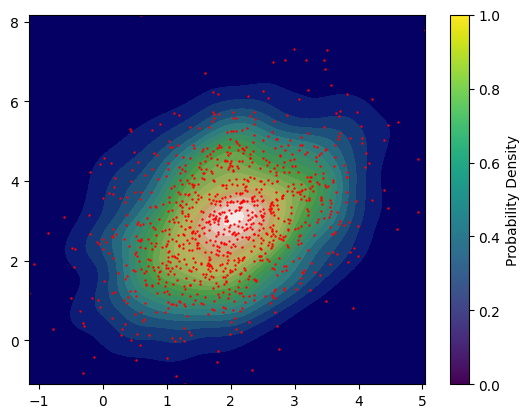

0.11570010991900415 5.204124950465026e-14


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

def generate_random_bivariate_gaussian(mean, cov_matrix, num_points):
    """
    Generate random (X, Y) points following a bivariate Gaussian distribution.

    Args:
        mean: A tuple (mean_x, mean_y) representing the mean of the distribution.
        cov_matrix: A 2x2 covariance matrix.
        num_points: The number of random points to generate.

    Returns:
        A NumPy array of shape (num_points, 2) containing the generated points.
    """
    # Generate random samples from a standard bivariate normal distribution
    points = np.random.multivariate_normal(mean, cov_matrix, num_points)
    return points

mean = [2, 3]
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])
num_points = 1000

# generate random points
random_points = generate_random_bivariate_gaussian(mean, cov_matrix, num_points)
x_min, y_min = random_points.min(axis=0)
x_max, y_max = random_points.max(axis=0)

# perform KDE
kernel = stats.gaussian_kde(random_points.T, bw_method='silverman')
# generate ground-truth distribution
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
pos = np.dstack((X, Y))
kernel_pos = np.vstack([X.ravel(), Y.ravel()])
z_bar = np.reshape(kernel(kernel_pos).T, X.shape)
rv = stats.multivariate_normal(mean, cov_matrix)
z = rv.pdf(pos)

# plt.contourf(X, Y, z, levels=20, cmap='gist_earth')
plt.contourf(X, Y, z_bar, levels=20, cmap='gist_earth')
plt.scatter(random_points[:, 0], random_points[:, 1], s=0.5, c='r')
plt.colorbar(label="Probability Density")
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
plt.show()
print(z_bar.max(), z_bar.min())


# FFHQ theta-Phi visualization

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:26<00:00,  3.73s/it]


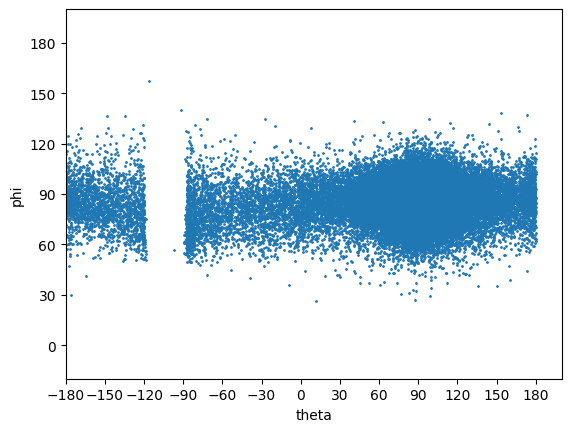

In [ ]:
import json
import numpy as np
from tqdm import tqdm

from utils.process_utils import find_meta_files
from utils.cam_pose_utils import get_cam_coords

json_file_paths = find_meta_files('./temp/ffhq_meta/')
coords = []
for json_file_path in tqdm(json_file_paths, position=0, leave=True):
    with open(json_file_path, 'r') as f:
        json_data = json.load(f)
    for img_path, img_meta in tqdm(json_data.items(), position=1, leave=False):
        for box_idx, box_meta in img_meta["head"].items():
            c2w = np.array(box_meta["camera"][:16]).reshape(4,4)
            theta, phi, r, x, y, z = get_cam_coords(c2w)
            coords.append((theta, phi))

coords = np.array(coords)
fig, ax = plt.subplots()
ax.scatter(coords[:, 0], coords[:, 1], s=1)
ax.set_xlim(-180, 200)
ax.set_ylim(-20, 200)
ax.set_xticks(np.arange(-180, 181, 30))
ax.set_yticks(np.arange(0, 181, 30))
ax.set_xlabel("theta")
ax.set_ylabel("phi")
plt.show()

# Test rebalance function
Test function provided by FFHQ

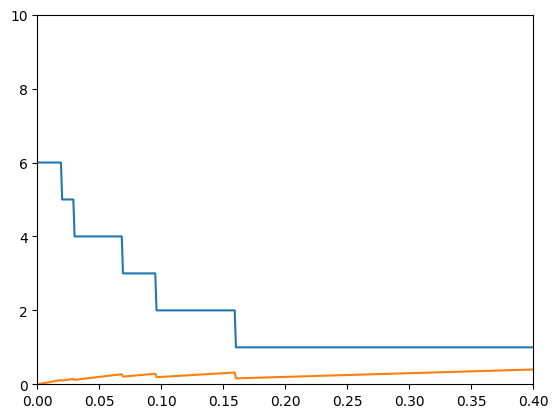

In [2]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(0, 1, 1000)
y = []
z = []
rd = []
for _x in x:
    if _x < 0.02:
        _y = 6
    elif _x < 0.03:
        _y = 5
    else:
        _y = min(4, max(1, round(0.24/_x)))
    y.append(_y)
    z.append(_x*_y)
    if _x != 0: rd.append(round(0.24/_x))
rd.insert(0, rd[0])
plt.ylim(0, 10)
plt.xlim(0, 0.4)
plt.plot(x, y)
plt.plot(x, z)
# plt.plot(x, rd)
plt.show()

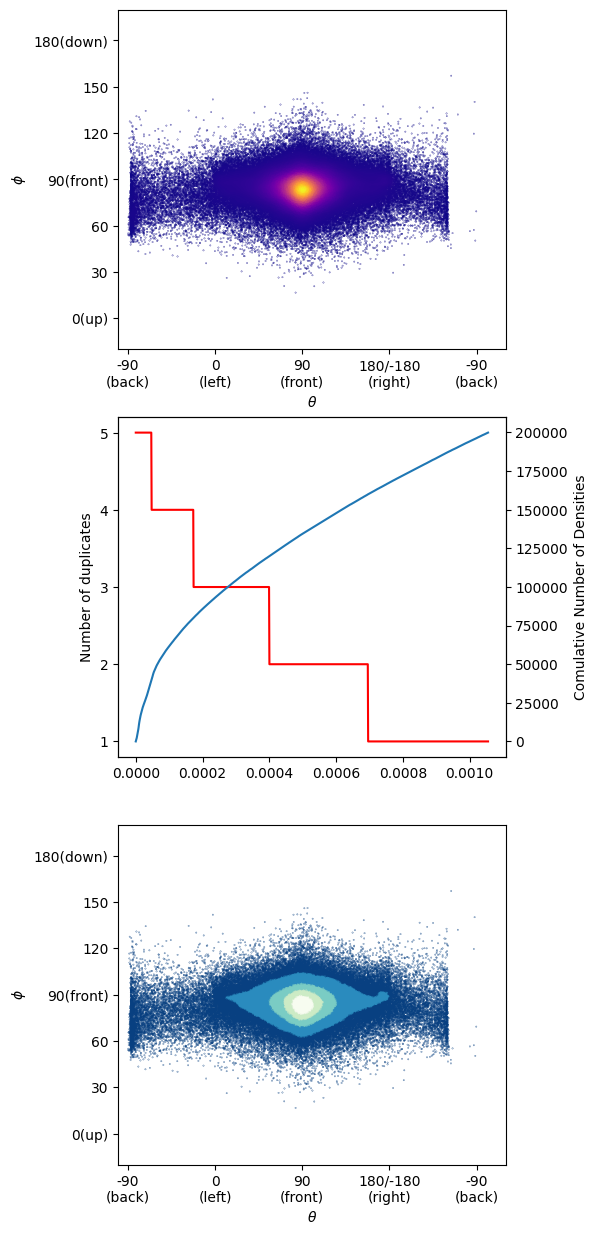

In [42]:
'''
Author: tianhao 120090472@link.cuhk.edu.cn
Date: 2023-09-26 09:57:54
LastEditors: tianhao 120090472@link.cuhk.edu.cn
LastEditTime: 2023-09-27 23:41:28
FilePath: /DatProc/05.rebalance_stat.py
Description: 
    Code to rebalance Dataset
Copyright (c) 2023 by ${git_name_email}, All Rights Reserved. 
'''
import os
import json
import argparse
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from scipy import stats
from multiprocessing import Pool
from matplotlib import pyplot as plt
from scipy.optimize import minimize

from utils.cam_pose_utils import get_cam_coords

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("-i", "--input_path", type=str, help="path to json metafile", default="/data/PanoHeadData/single_view/dataset.json")
    parser.add_argument("-o", "--output_dir", type=str, help="path to output directory", default="./temp")
    parser.add_argument("-j", "--num_workers", type=int, help="number of workers", default=256)
    # parser.add_argument("--force", action="store_true", help="force to overwrite existing files")
    args, _ = parser.parse_known_args()
    return args

def get_coord():
    coords_save_path = os.path.join(args.output_dir, "coords.npy")
    coords = []
    if not(hasattr(args, 'force')):
        if os.path.exists(coords_save_path):
            coords = np.load(coords_save_path)

    if isinstance(coords, list):
        print(f'Calculating coords...')
        with open(args.input_path, 'r') as f:
            json_data = json.load(f)
        for img_path, img_meta in tqdm(json_data.items()):
            c2w = np.array(img_meta["camera"][:16]).reshape(4,4)
            theta, phi, r, x, y, z = get_cam_coords(c2w)
            if theta < -90 and theta >= -180: theta += 360
            coords.append((theta, phi))
        coords = np.array(coords)
        np.save(coords_save_path, coords)
    return coords

def get_density(coords: np.array):
    global kernel
    density_save_path = os.path.join(args.output_dir, "density.npy")
    densities = []
    if not(hasattr(args, 'force')):
        if os.path.exists(density_save_path):
            densities = np.load(density_save_path)

    if isinstance(densities, list):
        print(f'Calculating density...')
        kernel = stats.gaussian_kde(coords.T)
        for coord in tqdm(coords):
            density = kernel(coord)
            densities.append(density)
        densities = np.array(densities)
        print(f'Maximum density: {np.max(densities)}, Minimum density: {np.min(densities)}')
        np.save(density_save_path, densities)
    return densities

def get_num_duplicate(densities: np.array, bin_bounds: np.array, a=0.002):
    N = []
    Z = []
    for density in tqdm(densities):
        if density < bin_bounds[1]:
            _N = len(bin_bounds) - 1
        else:
            _N = min(len(bin_bounds) - 2, max(1, round(a/density)))
        N.append(_N)
        Z.append(density*_N)
    return N, Z

def main():
    global kernel

    coords = get_coord()
    densities = get_density(coords)
    
    fig, axs = plt.subplots(3,1, figsize=(5, 15))
    ax1 = axs[0]
    theta = coords[:, 0]
    phi = coords[:, 1]
    ax1.scatter(theta, phi, s=0.05, c=densities, cmap='plasma')
    ax1.set_xlabel(r"$\theta$")
    ax1.set_ylabel(r"$\phi$")
    ax1.set_xticks(np.arange(-90, 271, 90))
    ax1.set_yticks(np.arange(0, 181, 30))
    ax1.set_xlim(-100, 300)
    ax1.set_ylim(-20, 200)
    ax1.set_xticklabels(['-90\n(back)', '0\n(left)', '90\n(front)', '180/-180\n(right)', '-90\n(back)'])
    ax1.set_yticklabels(['0(up)', '30', '60', '90(front)', '120', '150', '180(down)'])

    ax2 = axs[1]
    densities_unique, counts = np.unique(densities, return_counts=True)
    cumulative_counts = np.cumsum(counts)
    find_percentiles = [0, 20, 40, 60, 80, 100]
    percentiles = np.percentile(densities, find_percentiles)
    data_labels = []
    ax_xrange = np.linspace(densities_unique[0], densities_unique[-1], 1000)
    for value in ax_xrange:
        for idx, _ in enumerate(percentiles[:-1]):
            if percentiles[idx] <= value <= percentiles[idx+1]:
                data_labels.append(len(find_percentiles) - idx - 1)
                break
    ax2.plot(ax_xrange, data_labels, color='r')
    ax2.set_ylabel("Number of duplicates")
    ax2.set_yticks(np.arange(1,len(find_percentiles)))
    ax3 = ax2.twinx()
    ax3.plot(densities_unique, cumulative_counts)
    ax3.set_xlabel("Probability Density")
    ax3.set_ylabel("Comulative Number of Densities")

    ax3.vlines(percentiles, np.zeros_like(percentiles), np.arange(len(find_percentiles)-1, -1, -1), colors='r', linestyles='dashed')

    ax4 = axs[2]
    N = []
    for value in densities:
        for i in range(len(percentiles)-1):
            if percentiles[i] <= value <= percentiles[i+1]:
                N.append(len(find_percentiles) - i)
                break
    N = np.array(N)
    ax4.scatter(theta, phi, s=0.05, c=N, cmap='GnBu')
    ax4.set_xlabel(r"$\theta$")
    ax4.set_ylabel(r"$\phi$")
    ax4.set_xticks(np.arange(-90, 271, 90))
    ax4.set_yticks(np.arange(0, 181, 30))
    ax4.set_xlim(-100, 300)
    ax4.set_ylim(-20, 200)
    ax4.set_xticklabels(['-90\n(back)', '0\n(left)', '90\n(front)', '180/-180\n(right)', '-90\n(back)'])
    ax4.set_yticklabels(['0(up)', '30', '60', '90(front)', '120', '150', '180(down)'])

    plt.show()

if __name__ == '__main__':
    kernel = None
    args = parse_args()
    main()

# Visualize Deteced Heads in KHS

In [10]:
import os
import cv2
import numpy as np
import json
from PIL import Image
from tqdm import tqdm
from IPython import display

khs_meta_path = '/data_new/chence/K-Hairstyle-Filtered/Training/rawset/meta.json'
with open(khs_meta_path, 'r') as f:
    json_origin = json.load(f)


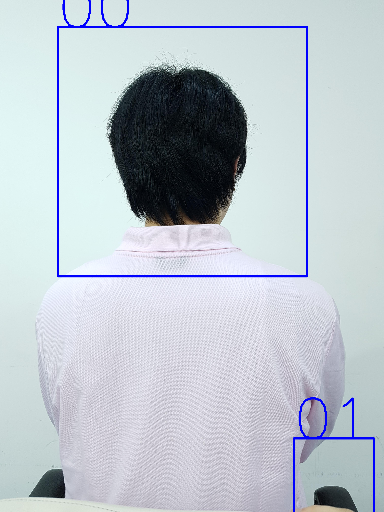

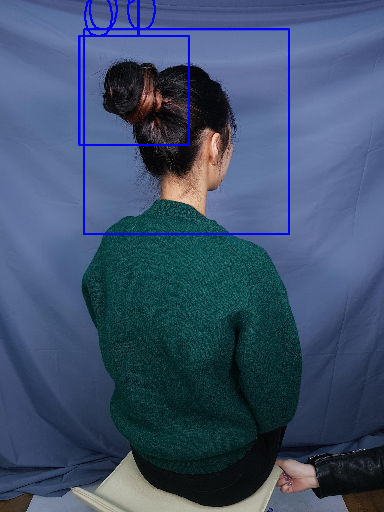

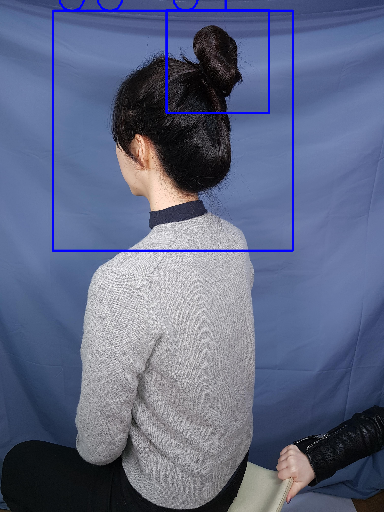

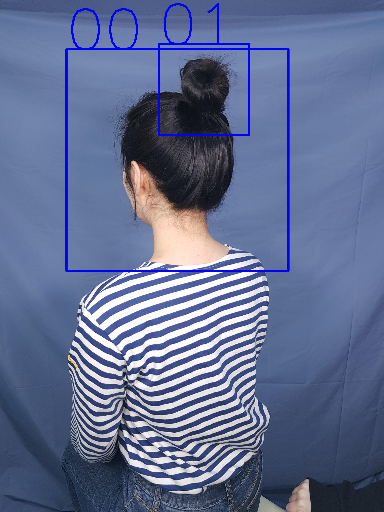

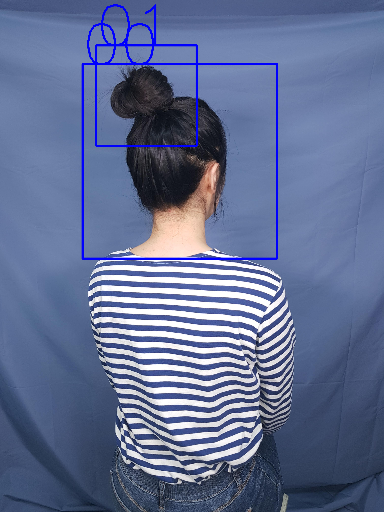

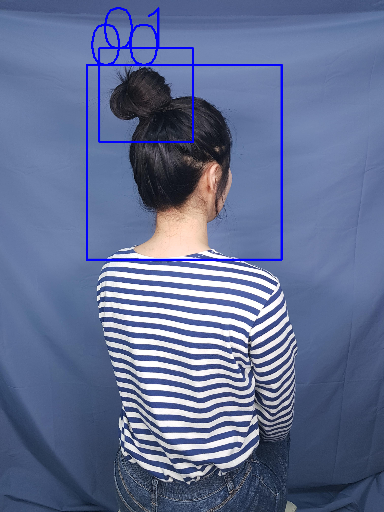

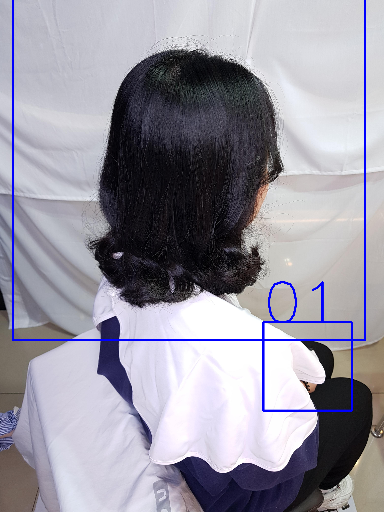

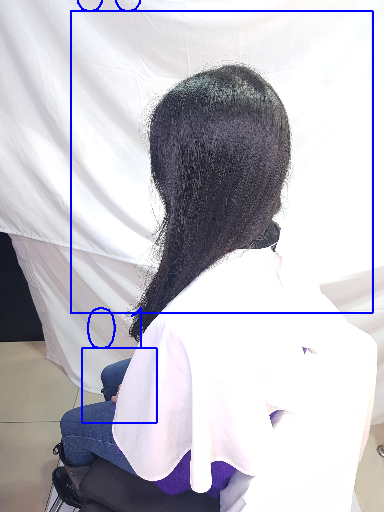

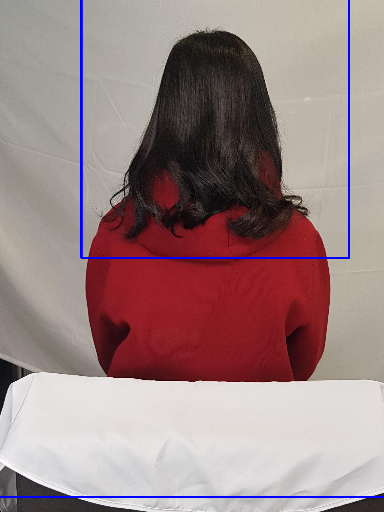

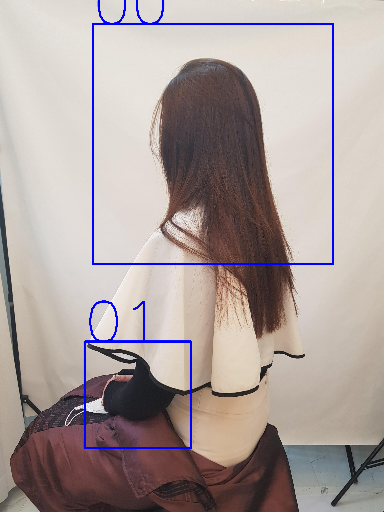

In [19]:
vis_num = 10
for image, image_meta in json_origin.items():
    # make sure there is only one head left
    if len(image_meta["head"].keys()) > 1:
        vis_num -= 1
        image_abs_path = os.path.join(os.path.dirname(khs_meta_path), image)
        img = cv2.imread(image_abs_path)
        h, w, _ = img.shape
        scale = 512 / h
        for head_box_id, head_box_coords in image_meta["raw"]["head_boxes"].items():
            x_1, y_1, w, h = head_box_coords
            x_2, y_2 = x_1 + w, y_1 + h
            cv2.rectangle(img, (int(x_1), int(y_1)), (int(x_2), int(y_2)), [255, 0, 0], int(2/scale)) # not sure if this is the correct box
            cv2.putText(img, head_box_id, (int(x_1), int(y_1)), cv2.FONT_HERSHEY_SIMPLEX, int(2/scale), (255, 0, 0), int(2/scale))
        img = cv2.resize(img, (0,0), fx=scale, fy=scale)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display.display(Image.fromarray(img))
    if vis_num == 0: break